# Apollo Missions Lab
Vaibhav Vasudevan, PHYS265

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.colors import LogNorm

# Constants
G = 6.67e-11  # gravitational constant
M_E = 5.9e24  # earth mass
M_M = 7.3e22  # moon mass
R_E = 6378e3  # earth radius
R_M = 1737e3  # moon radius
d_EM = 3.8e8  # earth to moon distance
g = 9.81  # gravity

ve = 2.4e3  # exhaust velocity 
m_dot = 1.3e4  # burn rate 
m0 = 2.4e6  # initial mass 
mf = 7.5e5  # final mass

## Part 1

In [2]:
# 1. function for gravitational potential
def gravitational_potential(M, xM, yM, x, y):
    r = np.sqrt((x - xM)**2 + (y - yM)**2)
    if np.any(r == 0):
        return np.inf * np.ones_like(r) 
    return -G * M / r

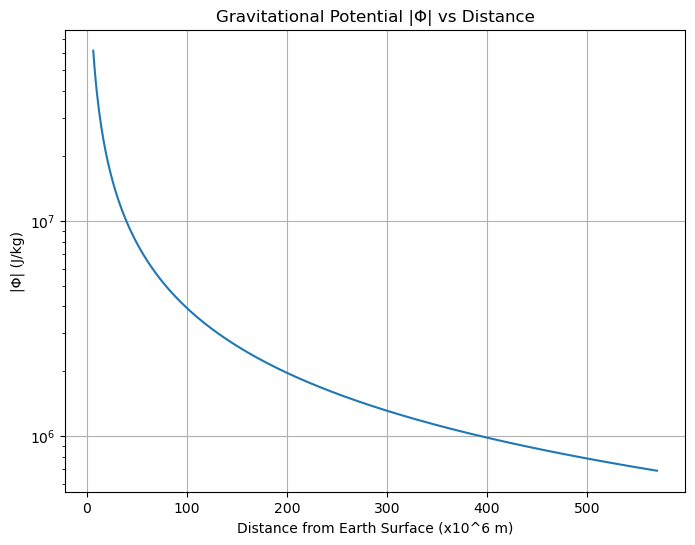

In [3]:
x_values = np.linspace(R_E, 1.5 * d_EM, 500)
phi_values = np.abs(gravitational_potential(M_E, 0, 0, x_values, np.zeros_like(x_values)))

plt.figure(figsize=(8,6))
plt.plot(x_values / 1e6, phi_values)
plt.yscale("log")
plt.xlabel("Distance from Earth Surface (x10^6 m)")
plt.ylabel("|Φ| (J/kg)")
plt.title("Gravitational Potential |Φ| vs Distance")
plt.grid()
plt.show()

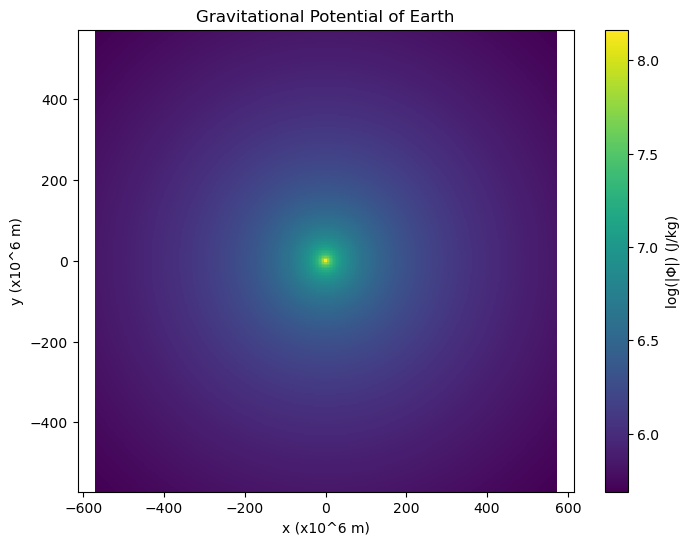

In [4]:
x = np.linspace(-1.5 * d_EM, 1.5 * d_EM, 300)
y = np.linspace(-1.5 * d_EM, 1.5 * d_EM, 300)
X, Y = np.meshgrid(x, y)

Phi = np.abs(gravitational_potential(M_E, 0, 0, X, Y))

plt.figure(figsize=(8,6))
plt.pcolormesh(X / 1e6, Y / 1e6, np.log10(Phi), shading='auto')
plt.colorbar(label="log(|Φ|) (J/kg)")
plt.xlabel("x (x10^6 m)")
plt.ylabel("y (x10^6 m)")
plt.title("Gravitational Potential of Earth")
plt.axis("equal")
plt.show()

## Part 2

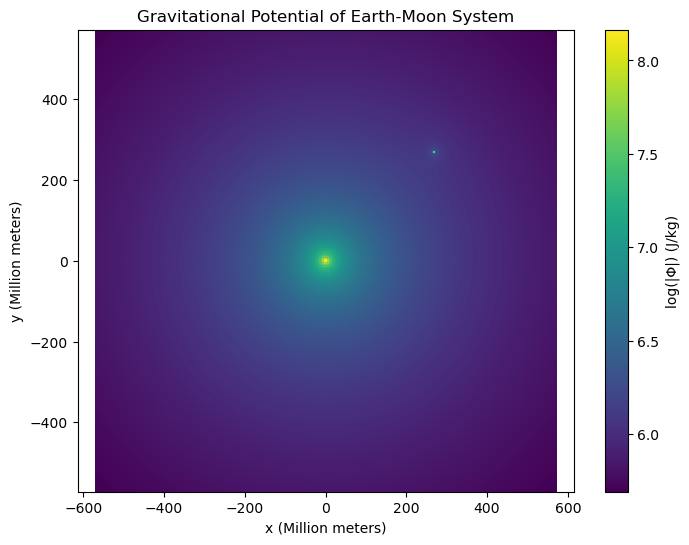

In [6]:
x_moon = d_EM / np.sqrt(2)
y_moon = d_EM / np.sqrt(2)

Phi_total = np.abs(gravitational_potential(M_E, 0, 0, X, Y)) + np.abs(gravitational_potential(M_M, x_moon, y_moon, X, Y))

plt.figure(figsize=(8,6))
plt.pcolormesh(X / 1e6, Y / 1e6, np.log10(Phi_total), shading='auto')
plt.colorbar(label="log(|Φ|) (J/kg)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Potential of Earth-Moon System")
plt.axis("equal")
plt.show()

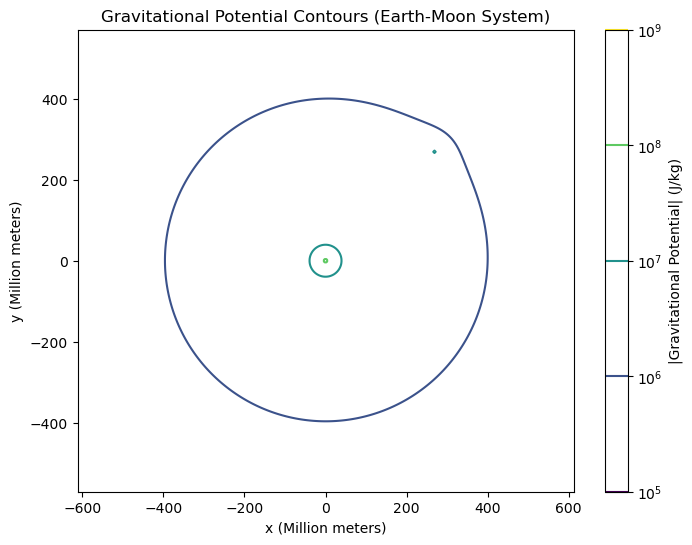

In [7]:
plt.figure(figsize=(8,6))
contour = plt.contour(X / 1e6, Y / 1e6, Phi_total, levels=50, norm=LogNorm())
plt.colorbar(contour, label="|Gravitational Potential| (J/kg)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Potential Contours (Earth-Moon System)")
plt.axis('equal')
plt.show()

## Part 3

In [12]:
def gravitational_force(M1, x1, y1, x2, y2):
    r_vec_x = x2 - x1
    r_vec_y = y2 - y1
    r_mag = np.sqrt(r_vec_x**2 + r_vec_y**2)
    r_mag = np.where(r_mag == 0, np.inf, r_mag)  

    F_mag = G * M1 / r_mag**2
    Fx = -F_mag * (r_vec_x / r_mag)
    Fy = -F_mag * (r_vec_y / r_mag)

    return Fx, Fy

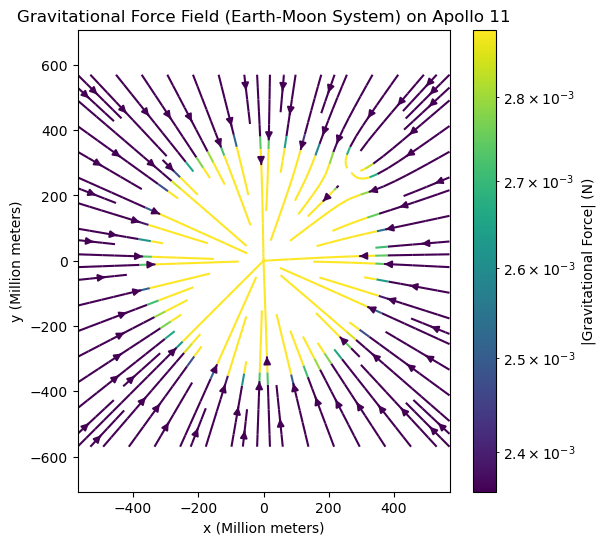

In [15]:
x_range = np.linspace(-1.5 * d_EM, 1.5 * d_EM, 500)
y_range = np.linspace(-1.5 * d_EM, 1.5 * d_EM, 500)
X, Y = np.meshgrid(x_range, y_range)

Force_Ex, Force_Ey = gravitational_force(M_E, 0, 0, X, Y)

x_m, y_m = d_EM / np.sqrt(2), d_EM / np.sqrt(2)
Force_Mx, Force_My = gravitational_force(M_M, x_m, y_m, X, Y)


Force_Tx = Force_Ex + Force_Mx
Force_Ty = Force_Ey + Force_My

plt.figure(figsize=(6, 6))
plt.streamplot(X / 1e6, Y / 1e6, Force_Tx, Force_Ty, color=np.hypot(Force_Tx, Force_Ty), norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label("|Gravitational Force| (N)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Force Field (Earth-Moon System) on Apollo 11")
plt.axis('equal')
plt.show()

## Part 4

In [18]:
T = (m0 - mf) / m_dot

def delta_v(t, m0, mf, m_dot, ve, g):
    m_t = np.maximum(m0 - m_dot * t, mf)  
    dv = ve * np.log(m0 / m_t) - g * t  
    return dv

altitude, _ = integrate.quad(lambda t: delta_v(t, m0, mf, m_dot, ve, g), 0, T)

print("Burn Time (T):", T)
print("Altitude:", altitude)

Burn Time (T): 126.92307692307692
Altitude: 64546.79615708323
